In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

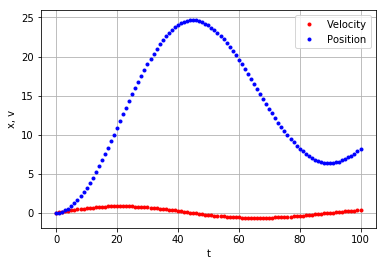

In [92]:
t, v = np.loadtxt('./files/cpresources/velocities.txt', unpack=True)

N = len(t)

x = np.empty(N)
x[0] = 0

    
for k in range(1,N):
    x[k] = x[k-1] + (v[k-1] + v[k])/2

plt.figure(1)
plt.plot(t,v,'r.',label='Velocity')
plt.plot(t,x,'b.',label='Position')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x, v')
plt.grid()
plt.show()

In [93]:
def f(x):
    return x**4 - 2*x + 1

N = 10000
a = 0.0
b = 2.0
h = (b-a)/N

s = f(a) + f(b) + 4*f(b-h)
for k in range(1,int(N/2)):
    s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)

#from math import abs
r = abs(h/3*s-4.4)/4.4

print('Value of the integral {} with releative error {}'.format(int(h/3*s),r))

Value of the integral 4 with releative error 4.037174635000569e-16


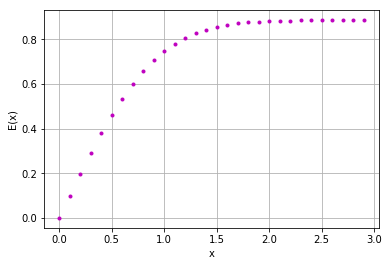

In [94]:
x = np.arange(0,3,0.1)

def simpson(f, a, b, n):
    """Approximates the definite integral of f from a to b by the
    composite Simpson's rule, using n subintervals (with n even)"""

    if n % 2:
        raise ValueError("n must be even (received n=%d)" % n)

    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)

    return s * h / 3

ex = simpson(lambda t:np.exp(-t**2), 0.0, x, 100000)

plt.figure(1)
plt.plot(x,ex,'m.')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.grid()
plt.show()

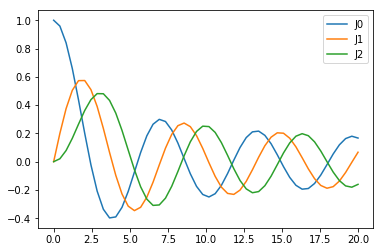

In [95]:
from numpy import cos,sin,pi
from pylab import *

def J(m,x):	
	
	def f(teta):
	    return cos(m*teta - x*sin(teta))
	
	N = 1000
	a = 0.
	b = pi
	h = (b-a)/N
	
	s = f(a) + f(b) + 4*f(b-h)
	for k in range(1,N//2):
	    s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
	
	I = h/3*s/pi
	
	return I

x = linspace(0,20)

plot(x,J(0,x),label='J0')
plot(x,J(1,x),label='J1')
plot(x,J(2,x),label='J2')
legend()
show()

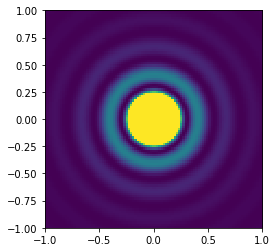

In [96]:
lambda1 = 0.5
k = 2*np.pi/lambda1

x,y = np.mgrid[-1:1:100j,-1:1:100j]
r = np.sqrt(x**2 + y**2)

I = (J(1,k*r)/(k*r))**2

plt.figure(1)
plt.imshow(I,vmax=0.1/10,extent=(-1,1,-1,1))
plt.show()

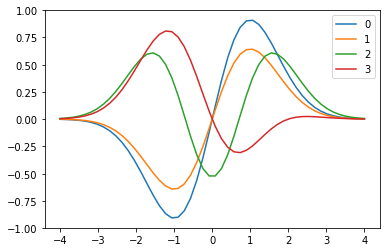

In [97]:
from math import factorial
from numpy import linspace,exp,sqrt,pi
from pylab import *


def H(n,x):
	H = [1,2*x]
	
	for ni in range(n):
		H.append(2*x*H[ni] - 2*ni*H[ni-1])
	
	return H[-1]

def ksi(n,x):
	
	return 1/sqrt(2**n*factorial(n)*sqrt(pi)) * exp(-x**2/2) * H(n,x)

	
x = linspace(-4,4)
n = [0,1,2,3]

for ni in n:
	plot(x,ksi(ni,x),label=ni)

legend()
show()


In [98]:
def f(x):
    return x**4 - 2*x + 1


def integrate(f,a,b,N=20):
	
	h = (b-a)/N
	
	s = 0.5*f(a) + 0.5*f(b)
	for k in range(1,N):
	    s += f(a+k*h)
	
	return h*s

I1 = integrate(f,0,2,5)
I2 = integrate(f,0,2,10)

diference = abs(4.4-I2)
delta = 1/3*abs(I2-I1)

print(
"""
N=10	I = {}
N=20	I = {}
delta = {}
difference = {}
delta - diference = {}
""".format(I1,I2,delta,diference,delta-diference)
)


N=10	I = 4.824960000000001
N=20	I = 4.50656
delta = 0.10613333333333348
difference = 0.10655999999999999
delta - diference = -0.0004266666666665059



In [99]:
def f(x):
    return np.sin(np.sqrt(100*x))**2

def resum(f,a,b,N):
	
	h = (b - a)/N
	
	s = 0
	for k in range(1,N//2+1):
		s+=f(a + (2*k-1)*h)
	
	return s*h
	
a = 0
b = 1


I = (b-a)/2*(f(b)+f(a))
eps=1
N=1

R = np.empty((100,100))
R[0,0]=I
i=0
while eps>1e-6:

	N*=2
	i+=1
	
	I_old = R[i-1,0]
	I_new = I_old/2 + resum(f,a,b,N)
	#eps = abs(I-I_new)/3
	#I = I_new
	
	R[i,0] = I_new
	s = '\t'
	s += '{0:.7f}'.format(R[i,0])
	for m in range(i):
		R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
		s += ' {0:.7f}'.format(R[i,m])
	
	print(s)
	
	eps = abs(R[i,m+1]-R[i-1,m])
	#I = R[i,m+1]
	
	#print('N={}\t I={}\t eps={}'.format(N,I,eps))

   


	0.3252319 0.3252319
	0.5122829 0.5122829 0.5746332
	0.4029974 0.4029974 0.3665690 0.3526980
	0.4301034 0.4301034 0.4391387 0.4439767 0.4454255
	0.4484147 0.4484147 0.4545184 0.4555437 0.4557274 0.4557678
	0.4539129 0.4539129 0.4557457 0.4558275 0.4558320 0.4558324 0.4558325
	0.4553485 0.4553485 0.4558270 0.4558325 0.4558325 0.4558325 0.4558325 0.4558325


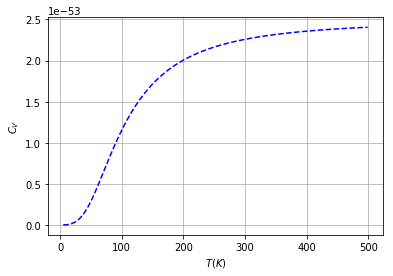

In [103]:
rho = 6.022e-28
V = 0.001
kB = 1.381e-23
thetaD = 428

f = lambda x: ((x**4)*np.exp(x))/(np.exp(x) - 1)**2

def cv(T):
    r = si.fixed_quad(f,0,thetaD/T)
    return (9*V*rho*kB*(T/thetaD)**3)*r[0]

T = np.arange(5,500)
CV = [cv(t) for t in T]

plt.figure(1)
plt.plot(T,CV,'b--')
plt.xlabel(r'$T (K)$')
plt.ylabel(r'$C_{V}$')
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/quadrature.py:85: RuntimeWarning: invalid value encountered in double_scalars
  return (b-a)/2.0 * np.sum(w*func(y, *args), axis=-1), None


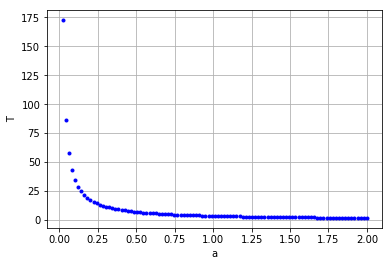

In [125]:
m = 1

v = lambda x: x**4

def T(a):
    I = lambda x: 1 / np.sqrt(V(a)-V(x))
    r = si.fixed_quad(I,0,a)
    return np.sqrt(8*m)*r[0]

a = np.linspace(0,2,100)
period = [T(aa) for aa in a]

plt.figure(1)
plt.plot(a,period,'b.')
plt.xlabel(r'a')
plt.ylabel(r'T')
plt.grid()
plt.show()

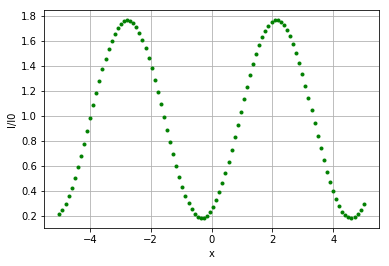

In [137]:
z = 3
lambda1 = 1

x = np.linspace(-5,5,100)
u = x*np.sqrt(2/(lambda1*z))

cs = lambda t: np.cos(0.5*np.pi*t)
sn = lambda t: np.sin(0.5*np.pi*t)

C = lambda u: si.fixed_quad(cs,0,u)[0]
S = lambda u: si.fixed_quad(sn,0,u)[0]

I = [1/8*((2*C(uu) + 1)**2 + (2*S(uu) + 1)**2) for uu in u]

plt.figure(1)
plt.plot(x,I,'g.')
plt.xlabel(r'x')
plt.ylabel(r'I/I0')
plt.grid()
plt.show()

In [140]:
print(float(math.inf))

inf


In [284]:
infinito = 2**9
kB = 1.381e-23
c = 2.99e8
hbar = 1.05e-34

def I():
    f = lambda x: (x**3)/(np.exp(x)-1)
    C = si.quad(f,0,infinito)
    return C[0]


sigma = ((kB**4)/(4*np.pi**2*c**2*hbar**3))*I()
print(sigma)

5.781132662520314e-08


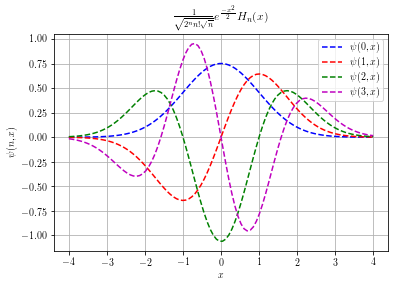

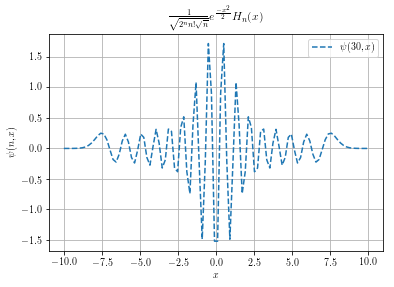

<x^{2}> para n=5:  1.88414436814


In [5]:
from scipy.special import factorial

def H(n,x):
    if n == 0:
        return 1
    elif n==1:
        return 2*x
    else:
        return 2*x*H(n-1,x) - 2*n*H(n-2,x)
    
def psi(n,x):
    return (1/(np.sqrt(2**n*np.sqrt(np.pi)*factorial(n))))*np.exp(-x**2/2)*H(n,x)
    

x = np.linspace(-4,4,100)

plt.figure(1)
plt.plot(x,psi(0,x),'b--',label=r'$\psi(0,x)$')
plt.plot(x,psi(1,x),'r--',label=r'$\psi(1,x)$')
plt.plot(x,psi(2,x),'g--',label=r'$\psi(2,x)$')
plt.plot(x,psi(3,x),'m--',label=r'$\psi(3,x)$')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(n,x)$')
plt.title(r'$\frac{1}{\sqrt{2^{n}n!\sqrt{n}}}e^{\frac{-x^{2}}{2}}H_{n}(x)$')
plt.grid()
plt.show()

x = np.linspace(-10,10,100)

plt.figure(2)
plt.plot(x,psi(30,x),'--',label=r'$\psi(30,x)$')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(n,x)$')
plt.title(r'$\frac{1}{\sqrt{2^{n}n!\sqrt{n}}}e^{\frac{-x^{2}}{2}}H_{n}(x)$')
plt.grid()
plt.show()

infinito = 2**9

def rms(n):
    I = lambda x: x**2*psi(n,x)*psi(n,x) #funcion par, uso integral(-inf,inf) = 2*integral(0,inf)
    
    mv = si.quad(I,0,infinito)
    r = np.sqrt(2*mv[0])
    
    return r

print('<x^{2}> para n=5: ',rms(5))

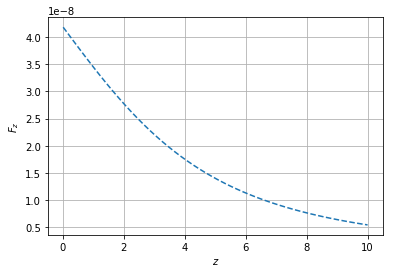

In [251]:
L = 10
G = 6.674e-11
m = 10000
A = 100
sigma = m/A

def F(z):
    I = lambda x,y: (x**2+y**2+z**2)**(-3/2) 
    fz = si.dblquad(I,-L/2,L/2,lambda y: -L/2,lambda y: L/2) # para integrales dobles, uno de los limites debe ser una funcion, aunque sea una constante
    
    return G*sigma*z*fz[0]

z = np.linspace(0.01,10)
F = [F(zz) for zz in z]

plt.figure(1)
plt.plot(z,F,'--')
plt.xlabel(r'$z$')
plt.ylabel(r'$F_{z}$')
plt.grid()
plt.show()

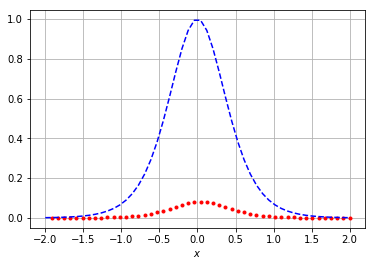

In [275]:
def f(x):
    return 1 + 0.5*np.tanh(2*x)

x = np.linspace(-2,2,50)
f = [f(xx) for xx in x]
df = np.diff(f)
df_exacta = (1 / np.cosh(2*x))**2

plt.figure(1)
plt.plot(x[1:,],df,'r.')
plt.plot(x,df_exacta,'b--')
plt.xlabel(r'$x$')
plt.grid()
plt.show()

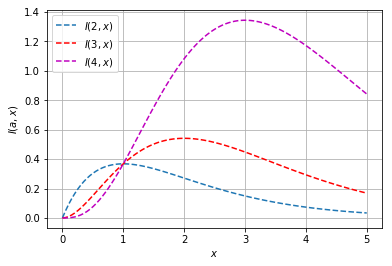

0.8862269254536111
2.0
120.0
362880.0


In [282]:
I = lambda a,x: x**(a-1)*np.exp(-x)

x = np.linspace(0,5,100)

I2 = [I(2,xx) for xx in x]
I3 = [I(3,xx) for xx in x]
I4 = [I(4,xx) for xx in x]

plt.figure(1)
plt.plot(x,I2,'--',label=r'$I(2,x)$')
plt.plot(x,I3,'r--',label=r'$I(3,x)$')
plt.plot(x,I4,'m--',label=r'$I(4,x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$I(a,x)$')
plt.legend(loc='best')
plt.grid()
plt.show()


def gamma(a):
    I_alt = lambda x: np.exp((a-1)*np.log(x))*np.exp(-x)
    
    gt = si.quad(I_alt,0,np.inf)
    return gt[0]

print(gamma(3/2))
print(gamma(3))
print(gamma(6))
print(gamma(10))

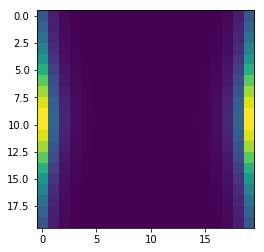

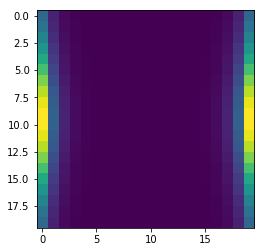

In [401]:
f = 100
lambda1 = 5e-5
w = 0.002
alpha = w
beta = 0.5*alpha

q = lambda u: np.sin(alpha*u)**2
qq = lambda u: np.sin(alpha*u)**2*np.sin(beta*u)**2

def I(q,x):
    integrando = lambda u: np.sqrt(q(u))*np.exp(1j*2*np.pi*x*u/(lambda1*f))
    real = lambda u: np.real(integrando(u))
    imag = lambda u: np.imag(integrando(u))

    r1 = si.quad(real,-w/2,w/2)
    r2 = si.quad(imag,-w/2,w/2)
    
    res = np.abs(r1[0] + 1j*r2[0])**2

    return res

x, y = np.mgrid[-10:10:20j,-5:5:20j]
c = x + y*1j
l = np.empty((len(x),len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        l[i,j] = I(q,c[i][j])

plt.figure(1)
plt.imshow(l)
plt.show()

x, y = np.mgrid[-10:10:20j,-5:5:20j]
c = x + y*1j
l = np.empty((len(x),len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        l[i,j] = I(qq,c[i][j])

plt.figure(2)
plt.imshow(l)
plt.show()

In [364]:
np.abs(1+1j*1)

1.4142135623730951

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


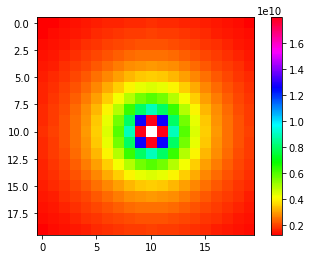

In [453]:
e0 = 8.85e-12

x, y = np.mgrid[-10:10,-10:10]

V = lambda q1, q2: (1/(4*np.pi*e0))*(q1/np.sqrt(x**2+y**2) + q2/np.sqrt(x**2+y**2))

plt.imshow(V(1,1))
plt.hsv()
plt.colorbar()
plt.show()

In [438]:
-1e9 > -8e9

True